In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


In [53]:
welding_df = pd.read_excel('welding.xlsx')

In [54]:
welding_df.drop(columns = 'S.No.',inplace=True)

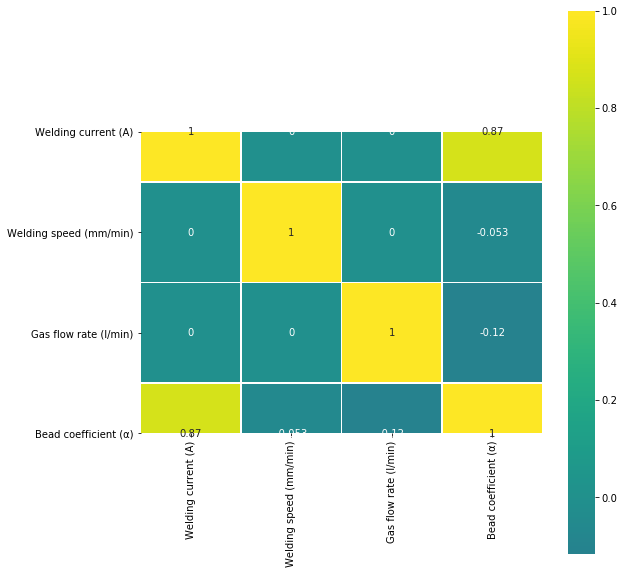

In [55]:
corr_back = welding_df.corr()
plt.figure(figsize = (9,10))
sns.heatmap(corr_back,cmap='viridis',annot=True,center=0,square=True,linewidth = 0.5)

In [56]:
welding_df.corr().iloc[0,:]

Welding current (A)       1.000000
Welding speed (mm/min)    0.000000
Gas flow rate (l/min)     0.000000
Bead coefficient (α)      0.870388
Name: Welding current (A), dtype: float64

### we can observe that Welding current is most important feature for determining The Bead coefficient

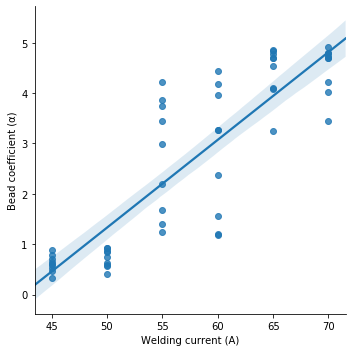

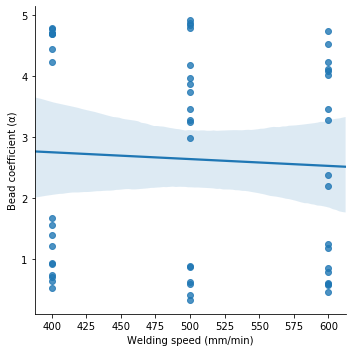

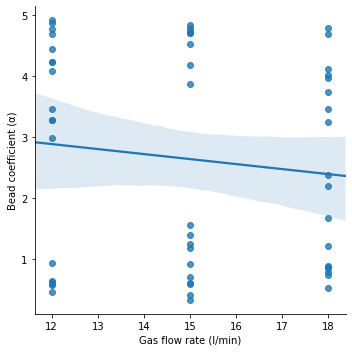

In [57]:
sns.lmplot(data=welding_df,x='Welding current (A)',y='Bead coefficient (α)')
sns.lmplot(data=welding_df,x='Welding speed (mm/min)',y='Bead coefficient (α)')
sns.lmplot(data=welding_df,x='Gas flow rate (l/min)',y='Bead coefficient (α)')

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [59]:
welding_df_27 = welding_df.iloc[0:27,:]
X = welding_df.loc[:,['Welding current (A)', 'Welding speed (mm/min)','Gas flow rate (l/min)']]
y = welding_df.loc[:,['Bead coefficient (α)']]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [62]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)
predictions = lin.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9431441336336448
MSE: 1.204133210836202
RMSE: 1.0973300373343482


In [63]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
predictions = svr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9850266578880145
MSE: 1.649095221611515
RMSE: 1.2841710250630618


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
predictions = gpr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.0463636363636364
MSE: 6.066427272727273
RMSE: 2.4630118295954797


In [65]:
welding_df_27

,Welding current (A),Welding speed (mm/min),Gas flow rate (l/min),Bead coefficient (α)
0,45,400,12,0.64
1,45,400,15,0.71
2,45,400,18,0.52
3,45,500,12,0.59
4,45,500,15,0.33
5,45,500,18,0.88
6,45,600,12,0.46
7,45,600,15,0.61
8,45,600,18,0.79
9,50,400,12,0.93


In [66]:
X = welding_df_27.loc[:,['Welding current (A)', 'Welding speed (mm/min)','Gas flow rate (l/min)']]
y = welding_df_27.loc[:,['Bead coefficient (α)']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [67]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)
predictions = lin.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.8807142857142856
MSE: 4.017147183483534
RMSE: 2.0042822115369714


In [68]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
predictions = svr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 2.0960464187671817
MSE: 5.636345081854928
RMSE: 2.3740987936172595


In [69]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
predictions = gpr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.9749999999999996
MSE: 10.180416666666668
RMSE: 3.1906765217844737
